<a href="https://colab.research.google.com/github/Shahmeer-Ahmed/Crop_Recommendation_System_DS_FA24/blob/main/MLProject%20(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.ensemble import RandomForestClassifier


In [21]:
df = pd.read_csv("Crop_recommendation.csv")
df2 = pd.read_csv("https://data.mendeley.com/datasets/8v757rr4st")
df.head()
df2.head()

HTTPError: HTTP Error 403: Forbidden

In [3]:
df.dtypes

,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


In [4]:
df = df.rename(columns={"N":"Nitrogen","P":"Phosphorus","K":"Potassium"})
df.head()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.shape

(2200, 8)

In [6]:
duplicate_rows_df =df[df.duplicated()]
print("Number of duplicates records are",duplicate_rows_df)

print(df.isnull().sum())

Number of duplicates records are Empty DataFrame
Columns: [Nitrogen, Phosphorus, Potassium, temperature, humidity, ph, rainfall, label]
Index: []
Nitrogen       0
Phosphorus     0
Potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


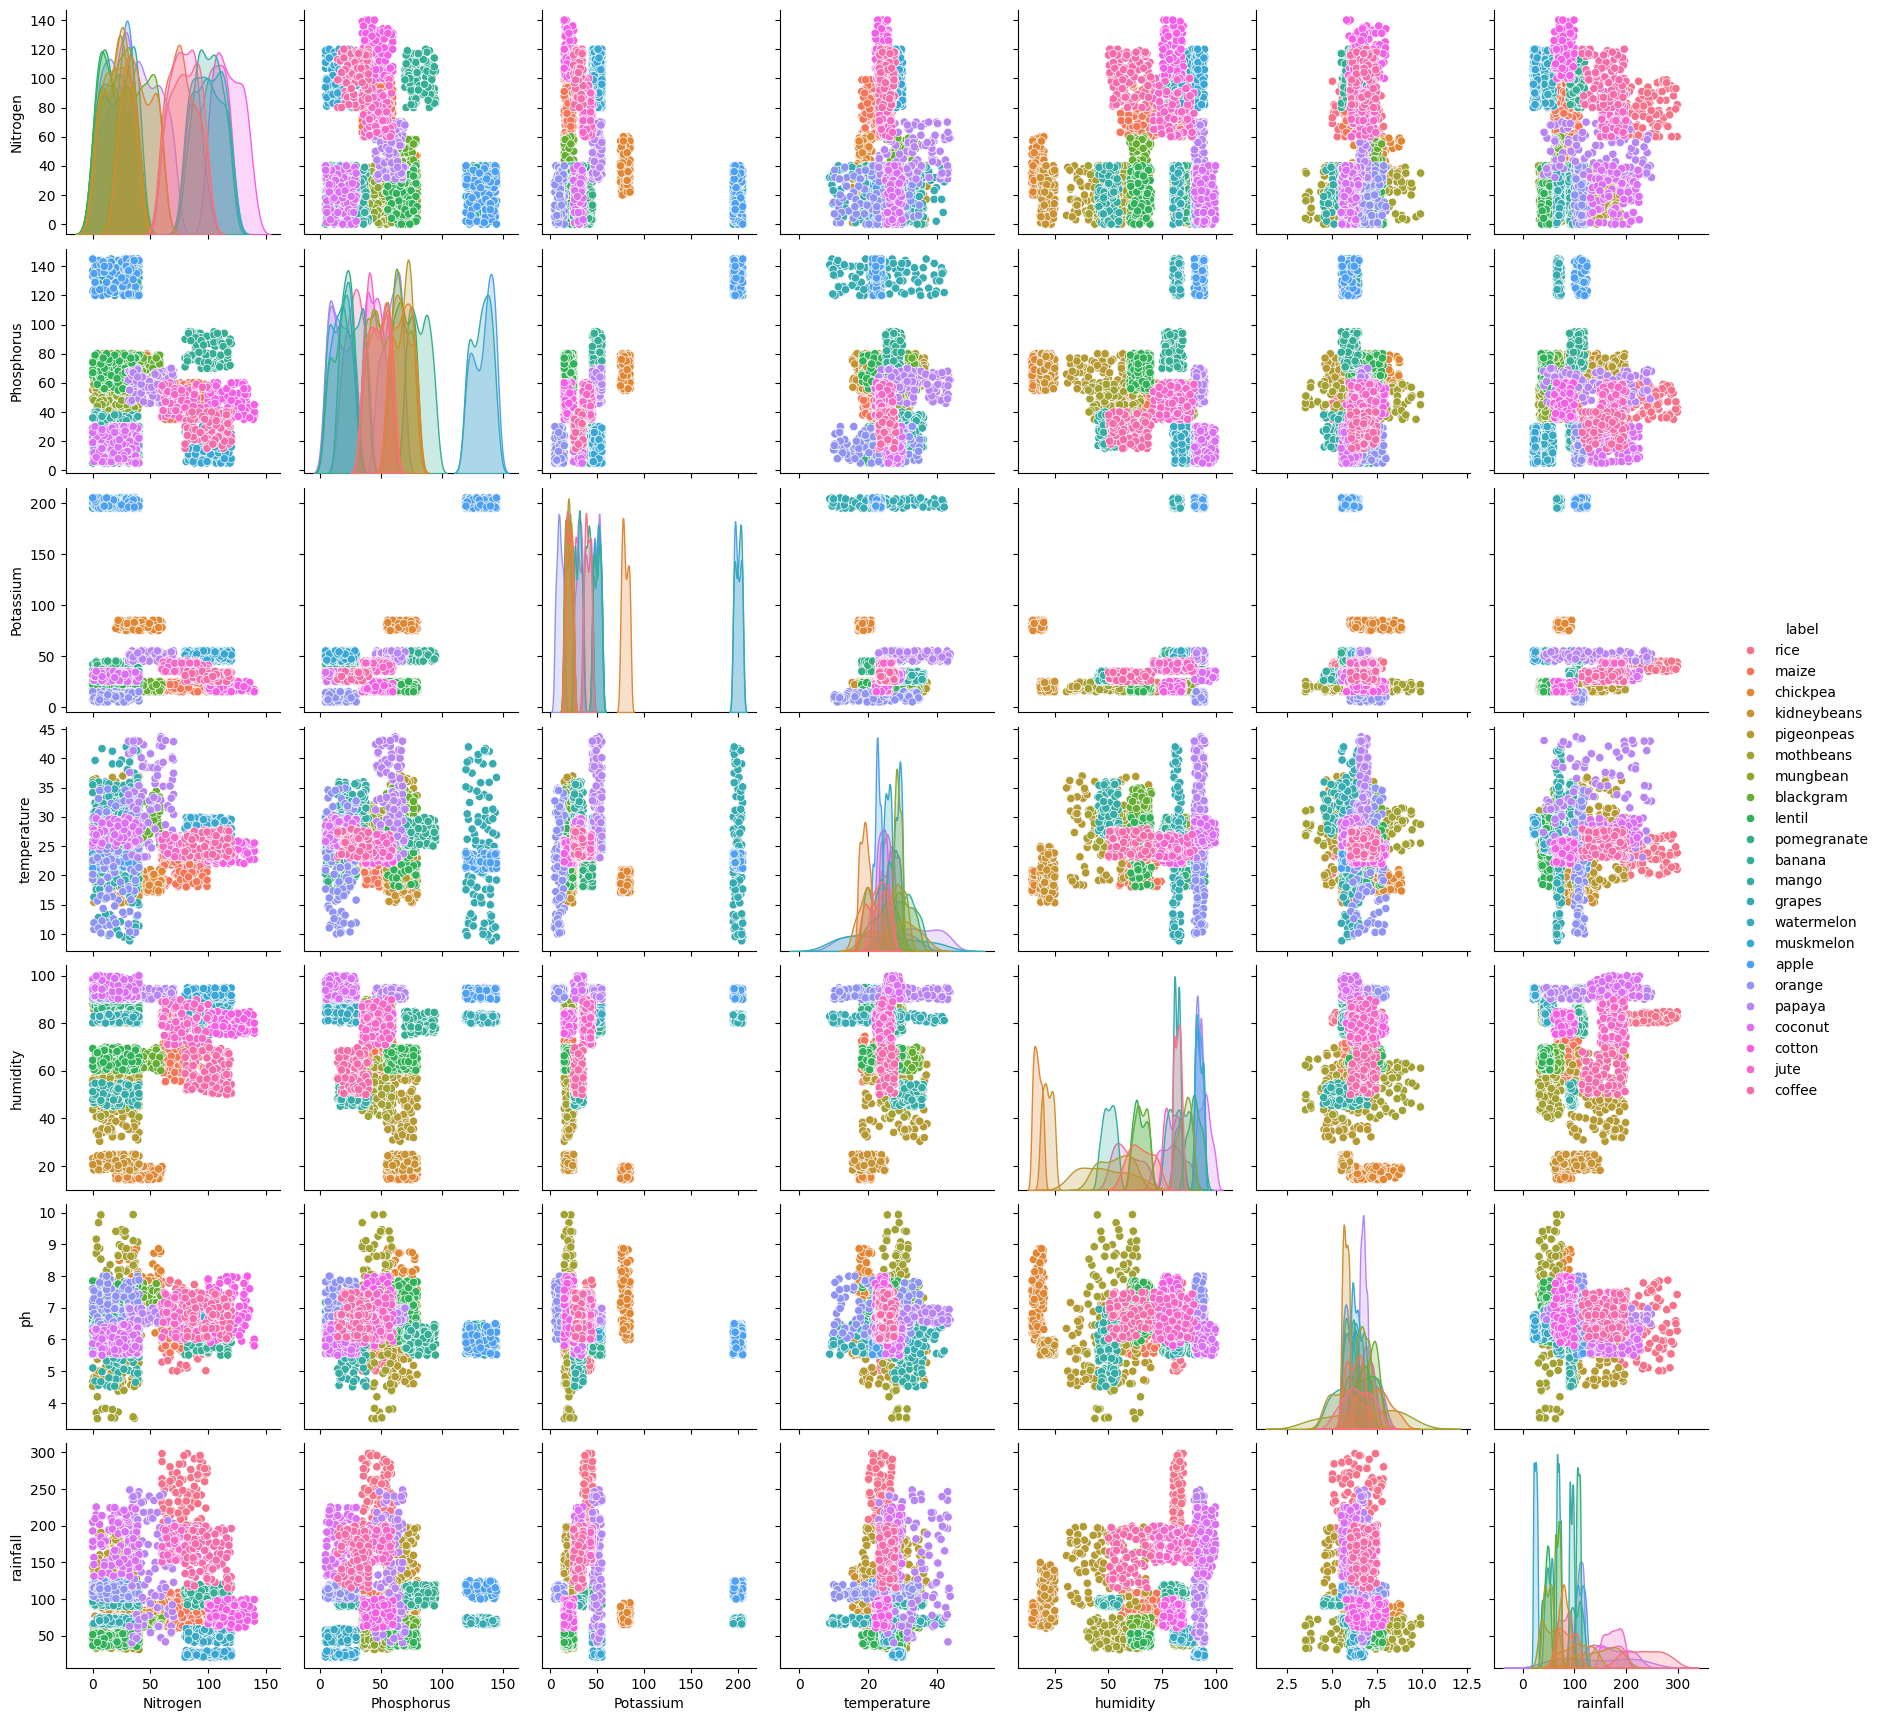

In [7]:
sns.pairplot(df, hue='label', diag_kind='kde')
plt.show()


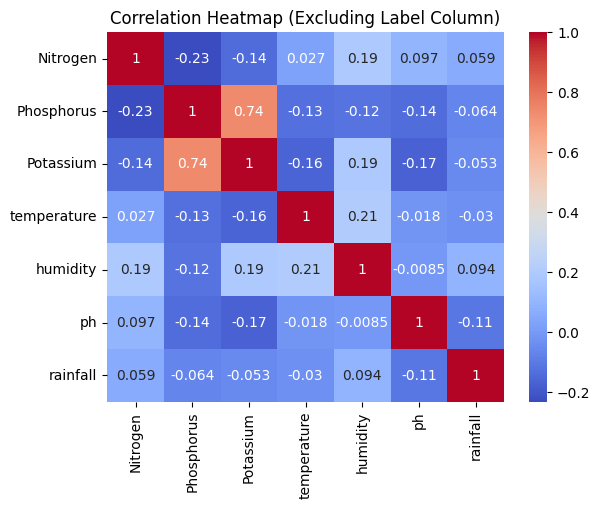

In [8]:
# Compute the correlation matrix excluding the 'label' column
corr_matrix = df.drop(columns=['label']).corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Excluding Label Column)")
plt.show()

In [9]:
##What is the most suitable crop based on the properties of the soil?

grouped_stats = df.groupby('label').mean()
print(grouped_stats)

             Nitrogen  Phosphorus  Potassium  temperature   humidity  \
label                                                                  
apple           20.80      134.22     199.89    22.630942  92.333383   
banana         100.23       82.01      50.05    27.376798  80.358123   
blackgram       40.02       67.47      19.24    29.973340  65.118426   
chickpea        40.09       67.79      79.92    18.872847  16.860439   
coconut         21.98       16.93      30.59    27.409892  94.844272   
coffee         101.20       28.74      29.94    25.540477  58.869846   
cotton         117.77       46.24      19.56    23.988958  79.843474   
grapes          23.18      132.53     200.11    23.849575  81.875228   
jute            78.40       46.86      39.99    24.958376  79.639864   
kidneybeans     20.75       67.54      20.05    20.115085  21.605357   
lentil          18.77       68.36      19.41    24.509052  64.804785   
maize           77.76       48.44      19.79    22.389204  65.09

In [10]:

# Example soil properties
soil_sample = {'Nitrogen': 50, 'Phosphorus': 30, 'Potassium': 3, 'ph': 6.5, 'temperature': 25, 'humidity': 60}

# Calculate distances
distances = grouped_stats.apply(
    lambda row: np.sqrt(
        (row['Nitrogen'] - soil_sample['Nitrogen'])**2 +
        (row['Phosphorus'] - soil_sample['Phosphorus'])**2 +
        (row['Potassium'] - soil_sample['Potassium'])**2 +
        (row['ph'] - soil_sample['ph'])**2 +
        (row['temperature'] - soil_sample['temperature'])**2 +
        (row['humidity'] - soil_sample['humidity'])**2
    ), axis=1
)

# Find the most suitable crop
most_suitable_crop = distances.idxmin()
print(f"The most suitable crop for the given soil properties is: {most_suitable_crop}")


The most suitable crop for the given soil properties is: maize


In [11]:
##Automated Process
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Features and target
X = df[['Nitrogen', 'Phosphorus', 'Potassium', 'ph', 'temperature', 'humidity']]
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict crop for new soil conditions
new_soil = pd.DataFrame([[50, 30, 40, 6.5, 25, 21]],
                        columns=['Nitrogen', 'Phosphorus', 'Potassium', 'ph', 'temperature', 'humidity'])

# Predict using the model
predicted_crop = model.predict(new_soil)
print(f"The predicted suitable crop is: {predicted_crop[0]}")



The predicted suitable crop is: mango


In [12]:

# Example regional conditions
regional_conditions = {
    'Nitrogen': 22,
    'Phosphorus': 25,
    'Potassium': 22,
    'ph': 7,
    'temperature': 22,  # temperature retained
    'humidity': 11      # humidity retained
}

# Define a tolerance range for matching
tolerance = {
    'Nitrogen': 10,
    'Phosphorus': 33,
    'Potassium': 33,
    'ph': 3.5,
    'temperature': 11,   # tolerance for temperature
    'humidity': 33       # tolerance for humidity
}

# Function to find suitable crops based on conditions
def find_suitable_crops(df, regional_conditions, tolerance):
    # Filter crops that match within the tolerance range for each condition
    conditions = (
        (df['Nitrogen'] >= regional_conditions['Nitrogen'] - tolerance['Nitrogen']) &
        (df['Nitrogen'] <= regional_conditions['Nitrogen'] + tolerance['Nitrogen']) &
        (df['Phosphorus'] >= regional_conditions['Phosphorus'] - tolerance['Phosphorus']) &
        (df['Phosphorus'] <= regional_conditions['Phosphorus'] + tolerance['Phosphorus']) &
        (df['Potassium'] >= regional_conditions['Potassium'] - tolerance['Potassium']) &
        (df['Potassium'] <= regional_conditions['Potassium'] + tolerance['Potassium']) &
        (df['ph'] >= regional_conditions['ph'] - tolerance['ph']) &
        (df['ph'] <= regional_conditions['ph'] + tolerance['ph']) &
        (df['temperature'] >= regional_conditions['temperature'] - tolerance['temperature']) &
        (df['temperature'] <= regional_conditions['temperature'] + tolerance['temperature']) &
        (df['humidity'] >= regional_conditions['humidity'] - tolerance['humidity']) &
        (df['humidity'] <= regional_conditions['humidity'] + tolerance['humidity'])
    )
    # Return suitable crops
    return df[conditions]['label'].unique()

# Find and print suitable crops
suitable_crops = find_suitable_crops(df, regional_conditions, tolerance)
print(f"Suitable crops for the given region: {suitable_crops}")


Suitable crops for the given region: ['kidneybeans' 'pigeonpeas' 'mothbeans']


In [13]:
 #Do regions with more rainfall have more available options for crops as compared to dry regions
rainfall_threshold = 56  # You can adjust this value based on your data

In [14]:
def analyze_crop_diversity(df, rainfall_threshold):
    # Assuming 'Rainfall' is a column in your DataFrame.
    # If not, replace 'Rainfall' with the actual column name.
    if 'rainfall' not in df.columns:
        print("Error: 'Rainfall' column not found in the DataFrame.")
        return None

    # Split the data into two groups based on rainfall
    high_rainfall_regions = df[df['rainfall'] >= rainfall_threshold]
    low_rainfall_regions = df[df['rainfall'] < rainfall_threshold]

    # Calculate the number of unique crops in each region
    high_rainfall_crop_diversity = len(high_rainfall_regions['label'].unique())
    low_rainfall_crop_diversity = len(low_rainfall_regions['label'].unique())

    # Compare and print the results
    print(f"Regions with rainfall above {rainfall_threshold}: {high_rainfall_crop_diversity} crop options")
    print(f"Regions with rainfall below {rainfall_threshold}: {low_rainfall_crop_diversity} crop options")

    # Optional: Return the results as a dictionary
    diversity_results = {
        "high_rainfall": high_rainfall_crop_diversity,
        "low_rainfall": low_rainfall_crop_diversity
    }

    return diversity_results

In [15]:
diversity_results = analyze_crop_diversity(df, rainfall_threshold)

Regions with rainfall above 56: 20 crop options
Regions with rainfall below 56: 6 crop options


In [16]:
#Are humidity, rainfall and temperature better predictor of crop options as compared to soil properties
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Features and target
X_soil = df[['Nitrogen', 'Phosphorus', 'Potassium', 'ph']]
X_weather = df[['humidity', 'rainfall', 'temperature']]
y = df['label']

# Split data
X_soil_train, X_soil_test, y_train, y_test = train_test_split(X_soil, y, test_size=0.2, random_state=42)
X_weather_train, X_weather_test, _, _ = train_test_split(X_weather, y, test_size=0.2, random_state=42)

# Train models
model_soil = RandomForestClassifier()
model_soil.fit(X_soil_train, y_train)

model_weather = RandomForestClassifier()
model_weather.fit(X_weather_train, y_train)

# Predict and evaluate
y_pred_soil = model_soil.predict(X_soil_test)
y_pred_weather = model_weather.predict(X_weather_test)

accuracy_soil = accuracy_score(y_test, y_pred_soil)
accuracy_weather = accuracy_score(y_test, y_pred_weather)

print(f"Accuracy using soil properties: {accuracy_soil}")
print(f"Accuracy using weather conditions: {accuracy_weather}")

Accuracy using soil properties: 0.8045454545454546
Accuracy using weather conditions: 0.9022727272727272


In [17]:
#Are certain crops more versatile (easy to grow) as compared to others?”
crop_ranges = {}
for crop in df['label'].unique():
    crop_data = df[df['label'] == crop]
    crop_ranges[crop] = {
        'Nitrogen': (crop_data['Nitrogen'].min(), crop_data['Nitrogen'].max()),
        'Phosphorus': (crop_data['Phosphorus'].min(), crop_data['Phosphorus'].max()),
        # ... (Include other features)
    }

In [18]:
versatility_scores = {}
for crop, ranges in crop_ranges.items():
    versatility_score = 0
    for feature, (min_val, max_val) in ranges.items():
        versatility_score += (max_val - min_val)
    versatility_scores[crop] = versatility_score

In [20]:
# Sort crops by versatility score in descending order
sorted_crops = sorted(versatility_scores.items(), key=lambda item: item[1], reverse=True)

# Print or display the results
for crop, score in sorted_crops:
    print(f"{crop}: {score}")

maize: 65
chickpea: 65
kidneybeans: 65
pigeonpeas: 65
mothbeans: 65
mungbean: 65
blackgram: 65
lentil: 65
pomegranate: 65
banana: 65
mango: 65
grapes: 65
watermelon: 65
muskmelon: 65
apple: 65
orange: 65
coconut: 65
cotton: 65
jute: 65
coffee: 65
rice: 64
papaya: 63


In [ ]:
##What is the relationship between rainfall levels and the required nutrient composition (NPK) for optimal crop growth

# Example: Divide data into three groups based on rainfall quantiles
df['rainfall_group'] = pd.qcut(df['rainfall'], 3, labels=['low', 'medium', 'high'])

In [ ]:
# Calculate average NPK values for each rainfall group
npk_by_rainfall = df.groupby('rainfall_group')[['Nitrogen', 'Phosphorus', 'Potassium']].mean()
print(npk_by_rainfall)

In [ ]:


# Example: Create a bar chart showing average NPK values for each rainfall group
npk_by_rainfall.plot(kind='bar', figsize=(10, 6))
plt.title('Average NPK Requirements by Rainfall Group')
plt.xlabel('Rainfall Group')
plt.ylabel('Nutrient Level')
plt.show()

In [ ]:
##“Which climatic factor (temperature, humidity, or rainfall) has the most influence on crop suitability when soil properties are accounted for?

# Features and target
X = df[['Nitrogen', 'Phosphorus', 'Potassium', 'ph', 'temperature', 'humidity', 'rainfall']]
y = df['label']

# Train model
model = RandomForestClassifier()
model.fit(X, y)

In [ ]:
# Get feature importances
feature_importances = model.feature_importances_

# Print or display feature importances
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importances[i]}")

In [ ]:
df['humidity_pH'] = df['humidity'] * df['ph']
df['humidity_N'] = df['humidity'] * df['Nitrogen']
df['humidity_P'] = df['humidity'] * df['Phosphorus']
df['humidity_K'] = df['humidity'] * df['Potassium']
df['pH_N'] = df['ph'] * df['Nitrogen']
df['pH_P'] = df['ph'] * df['Phosphorus']
df['pH_K'] = df['ph'] * df['Potassium']
# ... (Add more interaction terms as needed)

In [ ]:


# Features and target
X = df[['humidity', 'ph', 'Nitrogen', 'Phosphorus', 'Potassium',
       'humidity_pH', 'humidity_N', 'humidity_P', 'humidity_K',
       'pH_N', 'pH_P', 'pH_K']]  # Include interaction terms
y = df['label']

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Print or display feature importances
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importances[i]}")

In [ ]:
# Define the model with interaction terms
model = sm.ols('label ~ humidity * ph * Nitrogen * Phosphorus * Potassium', data=df).fit()

# Print the ANOVA table
print(model.summary())